<center><h1>Analyse en composantes principales</h1></center>

### Définition 

Analyse en composantes principales : est une méthode de la famille de l'analyse des données et plus généralement de la statistique multivariée, qui consiste à transformer des variables liées entre elles (dites « corrélées » en statistique) en nouvelles variables décorrélées les unes des autres. Ces nouvelles variables sont nommées « composantes principales », ou axes principaux. Elle permet au praticien de réduire le nombre de variables et de rendre l'information moins redondante.

### Données

Il s’agit de résumer l’information contenue dans un fichier décrivant (n = 18) 
véhicules à l’aide de (p = 6) variables.<br>
voir le fichier excel <b>data.xlsx</b>

### Importation des librairies

In [246]:
%%capture
!pip install -r requirements.txt

In [210]:
import os
import pandas
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

### Importation des données 

In [211]:
#modification du dossier de travail 
os.chdir(os.getcwd()) 
 
#version 
print(pandas.__version__) 
 
#chargement de la première feuille de données 
df = pandas.read_excel("data.xlsx")
X = df[['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'V.MAX']]

1.0.1


In [212]:
X.head()

,CYL,PUISS,LONG,LARG,POIDS,V.MAX
0,1350,79,393,161,870,165
1,1588,85,468,177,1110,160
2,1294,68,424,168,1050,152
3,1222,59,412,161,930,151
4,1585,98,439,164,1105,165


In [213]:
#dimension
print(X.shape)

#nombre d'observations
n = X.shape[0]

#nombre de variables
p = X.shape[1]

#affichage des données
X

(18, 6)


,CYL,PUISS,LONG,LARG,POIDS,V.MAX
0,1350,79,393,161,870,165
1,1588,85,468,177,1110,160
2,1294,68,424,168,1050,152
3,1222,59,412,161,930,151
4,1585,98,439,164,1105,165
5,1297,82,429,169,1080,160
6,1796,79,449,169,1160,154
7,1565,55,424,163,1010,140
8,2664,128,452,173,1320,180
9,1166,55,399,157,815,140


### Préparation des données

In [214]:
#scikit-learn
import sklearn

#vérification de la version
sklearn.__version__

'0.22.2.post1'

Nous instancions l’objet et nous l’appliquons sur la matrice X. Nous obtenons une matrice Z<br>
<b>𝑧𝑖𝑗 = (𝑥𝑖𝑗 − 𝑥̅𝑗) / 𝜎𝑗</b>

In [215]:
X.dtypes

CYL      int64
PUISS    int64
LONG     int64
LARG     int64
POIDS    int64
V.MAX    int64
dtype: object

In [216]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler

#instanciation
sc = StandardScaler()

#transformation – centrage-réduction
Z = sc.fit_transform(X)

pandas.DataFrame.from_records(Z)

,0,1,2,3,4,5
0,-0.775099,-0.283358,-1.885081,-1.097345,-1.569007,0.569760
1,-0.120163,0.019639,1.605810,2.001041,0.234161,0.145972
2,-0.929201,-0.838852,-0.442179,0.258199,-0.216631,-0.532090
3,-1.127333,-1.293348,-1.000722,-1.097345,-1.118215,-0.616848
4,-0.128419,0.676132,0.255999,-0.516398,0.196595,0.569760
5,-0.920946,-0.131860,-0.209453,0.451848,0.008765,0.145972
6,0.452217,-0.283358,0.721451,0.451848,0.609821,-0.362575
7,-0.183455,-1.495346,-0.442179,-0.710047,-0.517159,-1.549183
8,2.840806,2.191116,0.861086,1.226445,1.811934,1.841127
9,-1.281436,-1.495346,-1.605810,-1.871942,-1.982233,-1.549183


In [217]:
#vérification - librairie numpy
import numpy

#moyenne
print(numpy.mean(Z,axis=0))

[-2.22044605e-16 -1.41861831e-16  0.00000000e+00  1.86270752e-15
  5.73615229e-16  5.55111512e-16]


In [218]:
#écart-type
print(numpy.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1.]


### Analyse en composantes principales avec PCA de <b>scikit-learn</b>

In [219]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation
acp = PCA(svd_solver='full')

#affichage des paramètres
acp

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [220]:
#calculs
coord = acp.fit_transform(Z)

#nombre de composantes calculées
acp.n_components_

6

In [221]:
#to pandas data frame
pandas.DataFrame.from_records(coord)

,0,1,2,3,4,5
0,-2.138924,1.785681,0.571862,0.201927,-0.301357,0.053921
1,1.561459,-1.527040,1.315271,-0.211352,0.148516,-0.327238
2,-1.119385,-0.674505,0.456588,-0.167626,-0.375364,0.271803
3,-2.573742,0.112884,0.148570,-0.017343,0.226853,0.263476
4,0.427855,0.695567,-0.193286,-0.627754,0.263505,-0.037153
5,-0.304238,-0.196149,0.675803,-0.555941,-0.445086,0.200083
6,0.683928,-0.933057,-0.256823,0.203134,0.208652,0.153892
7,-1.948493,-0.980448,-0.619575,0.630319,0.293165,0.108642
8,4.409735,1.063633,-0.593528,0.847248,-0.374890,0.043997
9,-3.985782,0.236240,-0.303133,0.265122,0.278428,-0.328892


In [222]:
#variance expliquée
print(acp.explained_variance_)

[4.68090853 0.90641889 0.39501114 0.22650574 0.09826011 0.04583676]


In [223]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


In [224]:
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


In [225]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.73680968 0.14267705 0.06217768 0.03565368 0.01546687 0.00721505]


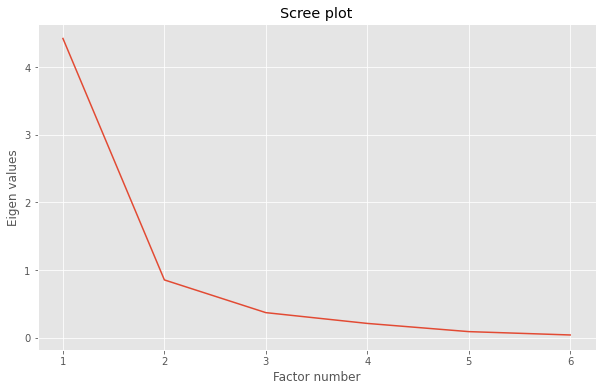

In [226]:
#scree plot
width = 10
height = 6
plt.figure(figsize=(width, height))
plt.plot(numpy.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

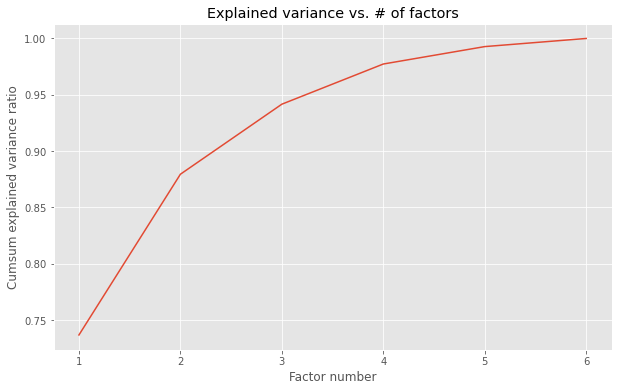

In [227]:
#cumul de variance expliquée
plt.figure(figsize=(width, height))
plt.plot(numpy.arange(1,p+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [228]:
#seuils pour test des bâtons brisés
bs = 1/numpy.arange(p,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]
print(bs)

[2.45       1.45       0.95       0.61666667 0.36666667 0.16666667]


In [229]:
#test des bâtons brisés
pandas.DataFrame({'Val.Propre':eigval,'Seuils':bs})

,Val.Propre,Seuils
0,4.420858,2.450000
1,0.856062,1.450000
2,0.373066,0.950000
3,0.213922,0.616667
4,0.092801,0.366667
5,0.043290,0.166667


18


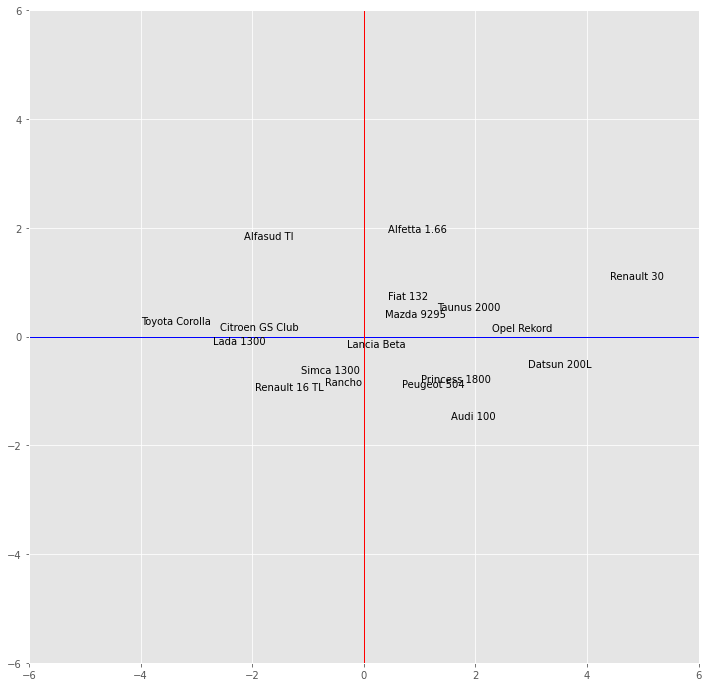

In [230]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))

#même limites en abscisse
axes.set_xlim(-6,6)

#et en ordonnée
axes.set_ylim(-6,6)
print(n)
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(df['Modele'][i], (coord[i,0], coord[i,1]))

#ajouter les axes
plt.plot([-6,6],[0,0],color='b',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='r',linestyle='-',linewidth=1)

#affichage
plt.show()

In [231]:
#contribution des individus dans l'inertie totale
di = numpy.sum(Z**2,axis=1)
pandas.DataFrame({'ID':df["Modele"],'d_i':di})

,ID,d_i
0,Alfasud TI,8.225176
1,Audi 100,6.673755
2,Simca 1300,2.159327
3,Citroen GS Club,6.780145
4,Fiat 132,1.169124
5,Lancia Beta,1.134950
6,Peugeot 504,1.512793
7,Renault 16 TL,5.636826
8,Renault 30,21.789657
9,Toyota Corolla,16.290143


In [232]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di

pandas.DataFrame({'id':df["Modele"],'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})

,id,COS2_1,COS2_2
0,Alfasud TI,0.556218,0.387670
1,Audi 100,0.365334,0.349406
2,Simca 1300,0.580284,0.210694
3,Citroen GS Club,0.976992,0.001879
4,Fiat 132,0.156579,0.413826
5,Lancia Beta,0.081555,0.033900
6,Peugeot 504,0.309202,0.575488
7,Renault 16 TL,0.673539,0.170535
8,Renault 30,0.892431,0.051920
9,Toyota Corolla,0.975219,0.003426


In [233]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(numpy.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [234]:
#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

pandas.DataFrame({'id':df["Modele"],'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})

,id,CTR_1,CTR_2
0,Alfasud TI,0.057493,0.206933
1,Audi 100,0.030640,0.151329
2,Simca 1300,0.015746,0.029525
3,Citroen GS Club,0.083244,0.000827
4,Fiat 132,0.002300,0.031398
5,Lancia Beta,0.001163,0.002497
6,Peugeot 504,0.005878,0.056499
7,Renault 16 TL,0.047711,0.062384
8,Renault 30,0.244369,0.073419
9,Toyota Corolla,0.199640,0.003622


In [235]:
#vérifions la théorie
print(numpy.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1.]


In [236]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.42493602  0.42179441  0.42145993  0.38692224  0.43051198  0.35894427]
 [ 0.12419108  0.41577389 -0.41181773 -0.446087   -0.24267581  0.6198626 ]
 [-0.35361252 -0.18492049  0.06763394  0.60486812 -0.48439601  0.48547226]
 [ 0.80778648 -0.35779199 -0.27975231  0.21156941 -0.30171136 -0.0735743 ]
 [ 0.15158003 -0.29373465  0.73056903 -0.47819008 -0.30455842  0.18865511]
 [-0.05889517 -0.63303302 -0.19029153 -0.10956624  0.5808122   0.45852167]]


In [237]:
#racine carrée des valeurs propres
sqrt_eigval = numpy.sqrt(eigval)

#corrélation des variables avec les axes
corvar = numpy.zeros((p,p))

for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.89346354  0.1149061  -0.21598347  0.37361508  0.04617627 -0.01225391]
 [ 0.88685803  0.38468911 -0.11294784 -0.16548492 -0.08948124 -0.13171084]
 [ 0.88615477 -0.38102873  0.04131023 -0.12939024  0.22255537 -0.03959265]
 [ 0.81353638 -0.4127359   0.36944822  0.09785447 -0.14567244 -0.0227967 ]
 [ 0.90518746 -0.22453248 -0.29586489 -0.13954667 -0.09277852  0.12084561]
 [ 0.75471037  0.57351941  0.29652226 -0.03402937  0.05747056  0.09540146]]


In [238]:
#on affiche pour les deux premiers axes
pandas.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})

,id,COR_1,COR_2
0,CYL,0.893464,0.114906
1,PUISS,0.886858,0.384689
2,LONG,0.886155,-0.381029
3,LARG,0.813536,-0.412736
4,POIDS,0.905187,-0.224532
5,V.MAX,0.754710,0.573519


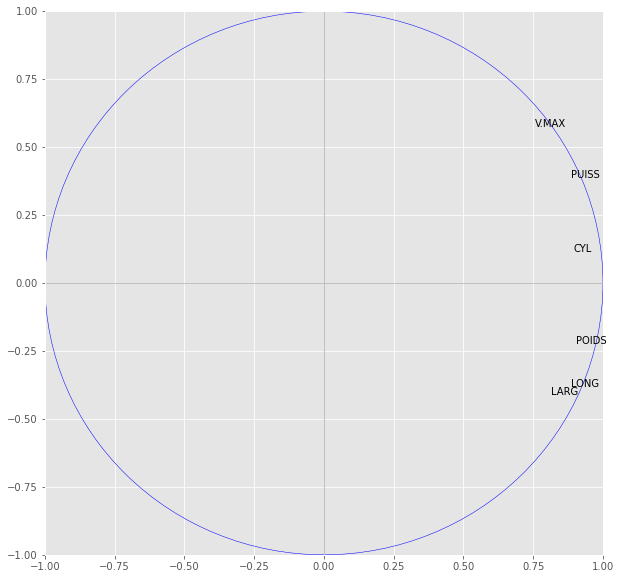

In [239]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

In [240]:
#cosinus carré des variables
cos2var = corvar**2
pandas.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]})

,id,COS2_1,COS2_2
0,CYL,0.798277,0.013203
1,PUISS,0.786517,0.147986
2,LONG,0.785270,0.145183
3,LARG,0.661841,0.170351
4,POIDS,0.819364,0.050415
5,V.MAX,0.569588,0.328925


In [241]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]

#on n'affiche que pour les deux premiers axes
pandas.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]})

,id,CTR_1,CTR_2
0,CYL,0.180571,0.015423
1,PUISS,0.177911,0.172868
2,LONG,0.177628,0.169594
3,LARG,0.149709,0.198994
4,POIDS,0.185341,0.058892
5,V.MAX,0.128841,0.384230


#### Réalisé par El Houcine ES SANHAJI

# Thank You